In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [27]:
file = 'CAR_HISTORICALDATA.xlsx'
df = pd.read_excel(file)
df.columns=['time','value']

In [23]:
df.describe()

,value
count,251.000000
mean,0.110646
std,0.026975
min,0.060596
25%,0.086698
50%,0.113069
75%,0.133009
max,0.168795


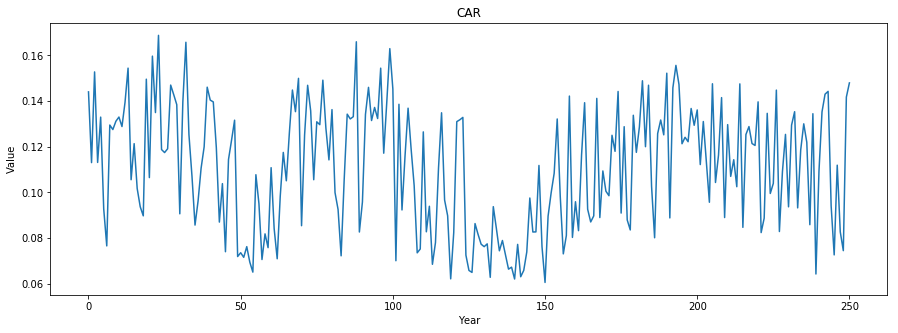

In [24]:
# tren 8%
plt.figure(figsize= (15,5))
plt.plot(df.value)
plt.title("CAR")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

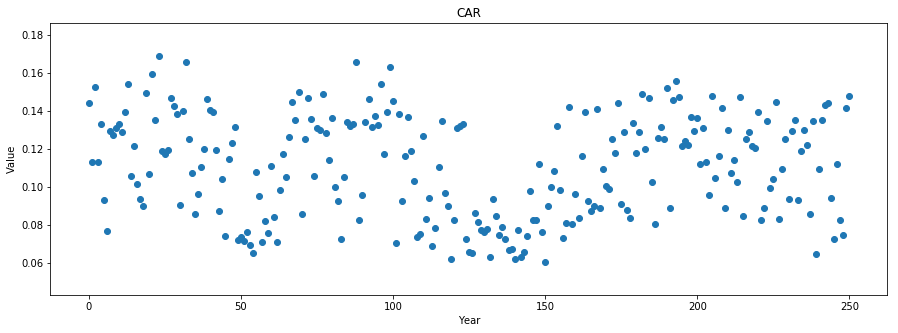

In [25]:
plt.figure(figsize= (15,5))
plt.scatter(x = df['value'].index, y = df.value)
plt.title("CAR")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

# Grouping Idea

In [28]:
# group by year:
times = pd.DatetimeIndex(df.time)

grouped = df.groupby([times.month]).mean()

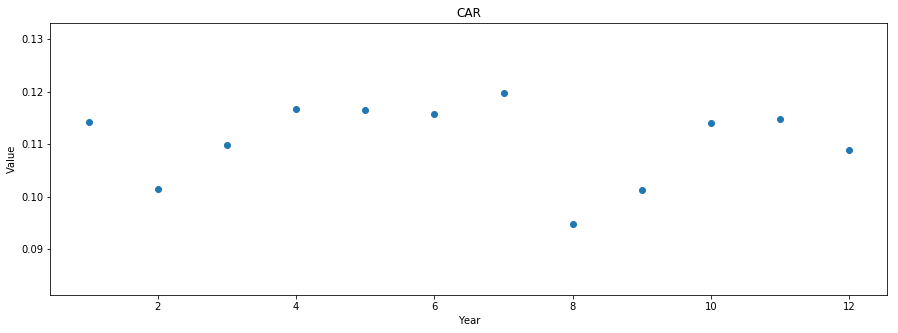

In [30]:
plt.figure(figsize= (15,5))
plt.scatter(x = grouped.value.index, y = grouped.value)
plt.title("CAR")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

# Linear Fit

Sine funcion coefficients:
[-2.00692731e-05  1.13154720e-01]
Covariance of coefficients:
[[ 5.52793775e-10 -6.90992223e-08]
 [-6.90992223e-08  1.15395702e-05]]


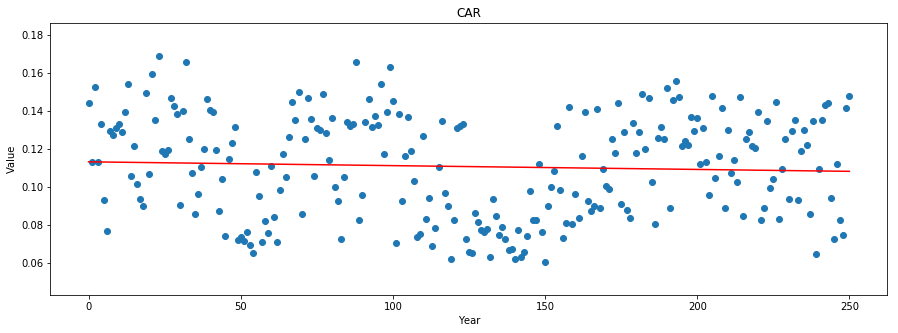

In [102]:
from scipy.optimize import curve_fit 

x = df.value.index.array
y = df['value'].values

def linear(x, m, b):
    return m*x + b
  
param, param_cov = curve_fit(linear, x, y)   
print("Funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 

index = np.linspace(0,250,250)
ans = linear(index, param[0], param[1])

plt.figure(figsize= (15,5))
plt.scatter(x = df['value'].index, y = df.value)
plt.title("CAR")
plt.xlabel("Year")
plt.ylabel("Value")
plt.plot(index,ans,c = 'r')

Funcion coefficients:
[-3.84498023e-09  2.90297890e-06 -5.29246254e-04  1.31281690e-01]
Covariance of coefficients:
[[ 3.05728037e-17 -1.14648013e-14  1.14419329e-12 -2.35991469e-11]
 [-1.14648013e-14  4.42310462e-12 -4.60023517e-10  1.01341479e-08]
 [ 1.14419329e-12 -4.60023517e-10  5.10793738e-08 -1.26931384e-06]
 [-2.35991469e-11  1.01341479e-08 -1.26931384e-06  4.23965461e-05]]


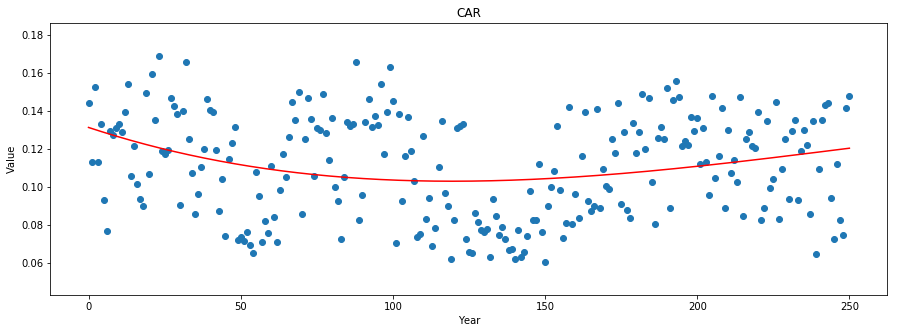

In [117]:
from scipy.optimize import curve_fit 

x = df.value.index.array
y = df['value'].values

def linear(x, a, b, c, d):
    return a*np.power(x,3) + b*np.power(x,2) + c*x + d
  
param, param_cov = curve_fit(linear, x, y)   
print("Funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 

index = np.linspace(0,250,1000)
ans = linear(index, param[0], param[1], param[2], param[3]) 

plt.figure(figsize= (15,5))
plt.scatter(x = df['value'].index, y = df.value)
plt.title("CAR")
plt.xlabel("Year")
plt.ylabel("Value")
plt.plot(index,ans,c = 'r')